In [3]:
# TensorFlow 설치
# TensorFlow는 딥러닝 모델을 구축하고 학습시키기 위한 라이브러리입니다.
!pip install tensorflow

# OpenCV 설치
# OpenCV는 컴퓨터 비전 작업을 수행하기 위한 라이브러리로 이미지 및 비디오 처리를 지원합니다.
!pip install opencv-python

In [4]:
# 현재 작업 디렉토리 확인
# os 라이브러리를 사용하여 현재 작업 디렉토리를 가져옵니다.
import os
current_directory = os.getcwd()
print("Current directory:", current_directory)  # 현재 작업 디렉토리를 출력합니다.

Current directory: /home/students/cs/202020894/public_html


In [5]:
# 필요한 라이브러리 임포트
import numpy as np  # 수치 계산을 위한 라이브러리
import pandas as pd  # 데이터 프레임을 처리하기 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import tensorflow as tf  # 딥러닝 모델 구축 및 학습을 위한 라이브러리
from tensorflow import keras  # 케라스 API를 사용하여 딥러닝 모델을 쉽게 구축할 수 있습니다.
import cv2  # OpenCV를 사용하여 이미지 및 비디오 처리
import seaborn as sns  # 데이터 시각화를 위한 라이브러리
import PIL  # Python Imaging Library, 이미지 처리를 지원합니다.
import xml.etree.ElementTree as ET  # XML 파싱을 위한 표준 라이브러리
import glob  # 파일 패턴 매칭을 위한 라이브러리
import zipfile  # ZIP 파일을 처리하기 위한 라이브러리

# 현재 작업 디렉토리 설정
directory = '.'

# face_mask.zip 파일을 찾아서 압축 해제
# 프로젝트의 데이터를 포함하는 압축 파일을 해제합니다.
for file_name in os.listdir(directory):  # 디렉토리 내 모든 파일 검사
    if file_name == 'face_mask.zip':  # face_mask.zip 파일을 찾기
        zip_path = os.path.join(directory, file_name)  # 압축 파일 경로 설정
        
        extract_path = '.'  # 압축 해제 경로 설정
        
        if not os.path.exists(extract_path):  # 경로가 존재하지 않으면
            os.makedirs(extract_path)  # 경로 생성
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:  # 압축 파일 열기
            zip_ref.extractall(extract_path)  # 압축 해제

# 이미지 및 주석 디렉토리 설정
# 데이터셋 디렉토리를 설정합니다.
img_dir = './face_mask'
annotation_dir = './face_mask'
input_dir = './face_mask'

# Output 디렉토리 생성
# 모델의 출력을 저장할 디렉토리를 생성합니다.
os.mkdir('./Output')
output_dir = './Output'

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)  # 현재 작업 디렉토리를 출력합니다.

# 원본 디렉토리 설정
# 작업 중 원래 디렉토리를 추적하기 위해 원본 디렉토리를 저장합니다.
original_dir = current_directory
print(original_dir)  # 원본 디렉토리 경로를 출력합니다.

2024-06-20 22:54:44.999659: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 22:54:45.046738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 22:54:45.794972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Current directory: /home/students/cs/202020894/public_html
/home/students/cs/202020894/public_html


In [6]:
# 이미지 파일 리스트 생성
# 이미지 파일을 리스트로 저장합니다.
img_file = []
for img in os.listdir(img_dir):  # 이미지 디렉토리 내 모든 파일 검사
    image = cv2.imread(os.path.join(img_dir, img), 0)  # 이미지를 흑백 모드로 읽기
    img_file.append(f'{img}')  # 이미지 파일 이름을 리스트에 추가

libpng warning: iCCP: Not recognizing known sRGB profile that has been edited


In [7]:
# 데이터 프레임 초기화
# 바운딩 박스 정보를 저장할 데이터 프레임을 초기화합니다.
df = {
    'name': [],
    'label': [],
    'width': [],
    'height': [],
    'xmin': [],
    'ymin': [],
    'xmax': [],
    'ymax': []
}

# 레이블 디렉토리와 이미지 디렉토리 설정
# 레이블 파일과 이미지 파일의 경로를 설정합니다.
label_dir = './face_mask'
image_dir = './face_mask'

# 레이블 파일을 읽어 데이터 프레임에 저장
# 레이블 파일을 읽어 바운딩 박스 정보를 추출하고 데이터 프레임에 저장합니다.
for label in glob.glob(os.path.join(label_dir, '*.txt')):  # 모든 레이블 파일 검사
    file_name = os.path.basename(label).split('.')[0]  # 파일 이름 추출
    image_path = os.path.join(image_dir, file_name + '.png')  # 이미지 파일 경로 설정
    image = cv2.imread(image_path)  # 이미지 파일 읽기
    image_height, image_width = image.shape[:2]  # 이미지 높이와 너비 가져오기
    with open(label, 'r') as file:  # 레이블 파일 열기
        for line in file:  # 각 줄을 읽어들임
            data = line.strip().split()  # 줄을 공백으로 분할
            class_id = int(data[0])  # 클래스 ID
            x_center = float(data[1]) * image_width  # 중심 x 좌표
            y_center = float(data[2]) * image_height  # 중심 y 좌표
            width = float(data[3]) * image_width  # 바운딩 박스 너비
            height = float(data[4]) * image_height  # 바운딩 박스 높이
            
            xmin = int(round(x_center - width / 2))  # 좌측 상단 x 좌표
            ymin = int(round(y_center - height / 2))  # 좌측 상단 y 좌표
            xmax = int(round(x_center + width / 2))  # 우측 하단 x 좌표
            ymax = int(round(y_center + height / 2))  # 우측 하단 y 좌표
            
            # 데이터 프레임에 값 추가
            df['name'].append(file_name)
            df['label'].append(class_id)
            df['width'].append(image_width)
            df['height'].append(image_height)
            df['xmin'].append(xmin)
            df['ymin'].append(ymin)
            df['xmax'].append(xmax)
            df['ymax'].append(ymax)

# 데이터 프레임 생성 및 출력
# 바운딩 박스 정보를 포함하는 데이터 프레임을 생성합니다.
df = pd.DataFrame(df)
print(df)  # 데이터 프레임을 출력합니다.

libpng warning: iCCP: Not recognizing known sRGB profile that has been edited


                 name  label  width  height  xmin  ymin  xmax  ymax
0     maksssksksss356      0    301     400   112   177   217   301
1     maksssksksss334      0    400     312    95    73   135   126
2     maksssksksss334      0    400     312   192    99   233   145
3     maksssksksss334      0    400     312   258   104   304   150
4     maksssksksss334      1    400     312   333   105   366   143
...               ...    ...    ...     ...   ...   ...   ...   ...
3875  maksssksksss381      1    400     311   378   134   384   143
3876  maksssksksss526      1    400     263    65    29    99    65
3877  maksssksksss526      0    400     263   164    84   199   119
3878  maksssksksss526      0    400     263   250    87   284   122
3879  maksssksksss526      1    400     263   308   106   349   145

[3880 rows x 8 columns]


In [8]:
# 데이터 프레임 확인
df1 = pd.DataFrame(df)
df1.head()  # 데이터 프레임의 첫 5행을 출력합니다.

,name,label,width,height,xmin,ymin,xmax,ymax
0,maksssksksss356,0,301,400,112,177,217,301
1,maksssksksss334,0,400,312,95,73,135,126
2,maksssksksss334,0,400,312,192,99,233,145
3,maksssksksss334,0,400,312,258,104,304,150
4,maksssksksss334,1,400,312,333,105,366,143


In [9]:
# 레이블 매핑 설정
# 클래스 ID를 실제 레이블로 매핑합니다.
labeling = {0 : 'with_mask',
            1 : 'without_mask',
            2 : 'mask_dumb'}
df1['class'] = df1['label']  # 'class' 컬럼에 'label' 값 복사
df1['label'] = df1['label'].map(labeling)  # 'label' 값을 레이블링 매핑으로 변경

In [10]:
# 매핑 결과 확인
df1.head()  # 데이터 프레임의 첫 5행을 출력합니다.

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss356,with_mask,301,400,112,177,217,301,0
1,maksssksksss334,with_mask,400,312,95,73,135,126,0
2,maksssksksss334,with_mask,400,312,192,99,233,145,0
3,maksssksksss334,with_mask,400,312,258,104,304,150,0
4,maksssksksss334,without_mask,400,312,333,105,366,143,1


In [11]:
# 학습, 검증, 테스트 데이터셋 분할
# 데이터를 학습, 검증, 테스트 세트로 분할합니다.
from sklearn.model_selection import train_test_split

# 초기 분할: 60% Train, 40% Test
train, test = train_test_split(img_file, test_size=0.2, random_state=101)

# 임시 데이터셋을 50% 검증, 50% 테스트로 재분할
# Train : Validation : Test = 6 : 2 : 2로 분할 
train, val = train_test_split(train, test_size=0.25, random_state=101)

# 데이터셋 크기 출력
print(f"Train set size: {len(train)}")  # 학습 데이터셋 크기 출력
print(f"Validation set size: {len(val)}")  # 검증 데이터셋 크기 출력
print(f"Test set size: {len(test)}")  # 테스트 데이터셋 크기 출력

In [12]:
%cd Output
current_directory = os.getcwd()
print("Current directory:", current_directory)

/home/students/cs/202020894/public_html/Output
Current directory: /home/students/cs/202020894/public_html/Output


In [14]:
# JupyterLab 및 Git 설치
# JupyterLab과 Git 확장을 설치하여 코드와 결과를 관리합니다.
!pip install --upgrade jupyterlab jupyterlab-git
!pip install jupyterlab-git

In [15]:
# YOLOv5 설치
# YOLOv5 모델을 GitHub에서 클론하여 설치합니다.
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16651, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 16651 (delta 81), reused 114 (delta 56), pack-reused 16459
Receiving objects: 100% (16651/16651), 15.29 MiB | 20.99 MiB/s, done.
Resolving deltas: 100% (11387/11387), done.
/home/students/cs/202020894/public_html/Output/yolov5
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/usr/anaconda3/lib/python3.11/site-packages/nvidia/nccl/__init__.py'
Consider using the `--user` option or check the permissions.



In [16]:
# 현재 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)  # 현재 작업 디렉토리를 출력합니다.

Current directory: /home/students/cs/202020894/public_html/Output/yolov5


In [17]:
# 학습, 검증, 테스트 디렉토리 생성
# YOLOv5 모델 학습을 위해 필요한 디렉토리를 생성합니다.
os.makedirs('./data/train/images', exist_ok=True)
os.makedirs('./data/train/labels', exist_ok=True)
os.makedirs('./data/val/images', exist_ok=True)
os.makedirs('./data/val/labels', exist.ok=True)
os.makedirs('./data/test/images', exist_ok=True)
os.makedirs('./data/test/labels', exist.ok=True)

In [18]:
# 원본 디렉토리로 이동
# 작업 디렉토리를 원본 디렉토리로 변경합니다.
os.chdir(original_dir)
current_directory = os.getcwd()
print("Current directory:", current_directory)  # 현재 작업 디렉토리를 출력합니다.

Current directory: /home/students/cs/202020894/public_html


In [19]:
# 이미지 복사 함수 정의
# 이미지 파일을 지정한 디렉토리로 복사하고 크기를 조정합니다.
def copy_image(image_items, folder_name):
    image_extensions = ('.png')  # 이미지 확장자 설정
    for image in image_items:  # 이미지 목록 반복
        if image.lower().endswith(image_extensions):  # 이미지 확장자 확인
            img = PIL.Image.open(f'{img_dir}/{image}')  # 이미지 열기
            img1 = img.resize((640, 480))  # 이미지 크기 조정
            _ = img1.save(f'{output_dir}/yolov5/data/{folder_name}/images/{image}')  # 이미지 저장

# 학습, 검증, 테스트 이미지 복사
copy_image(train, 'train')
copy_image(val, 'val')
copy_image(test, 'test')

In [20]:
# 바운딩 박스 크기 조정
# 바운딩 박스 좌표를 YOLO 형식에 맞게 조정합니다.
df1['xmin'] = (640/df1['width']) * df1['xmin']
df1['ymin'] = (480/df1['height']) * df1['ymin']
df1['xmax'] = (640/df1['width']) * df1['xmax']
df1['ymax'] = (480/df1['height']) * df1['ymax']
df1.head()  # 데이터 프레임의 첫 5행을 출력합니다.

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,maksssksksss356,with_mask,301,400,238.139535,212.400000,461.395349,361.200000,0
1,maksssksksss334,with_mask,400,312,152.000000,112.307692,216.000000,193.846154,0
2,maksssksksss334,with_mask,400,312,307.200000,152.307692,372.800000,223.076923,0
3,maksssksksss334,with_mask,400,312,412.800000,160.000000,486.400000,230.769231,0
4,maksssksksss334,without_mask,400,312,532.800000,161.538462,585.600000,220.000000,1


In [21]:
# 데이터 타입 변환
# 바운딩 박스 좌표를 정수형으로 변환합니다.
df1[['xmin', 'ymin', 'xmax', 'ymax']] = df1[['xmin', 'ymin', 'xmax', 'ymax']].astype('int')


In [22]:
# 이미지 크기 상수 설정
# 이미지 크기를 상수로 정의합니다.
WIDTH = 640
HEIGHT = 480

In [23]:
# 바운딩 박스 중심 좌표 및 크기 계산
# YOLO 형식에 맞게 바운딩 박스 정보를 계산합니다.
df1['x_center'] = (df1['xmin']+df1['xmax'])/(2*WIDTH)
df1['y_center'] = (df1['ymin']+df1['ymax'])/(2*HEIGHT)
df1['box_width'] = (df1['xmax']-df1['xmin'])/ WIDTH
df1['box_height'] = (df1['ymax']-df1['ymin'])/ HEIGHT

In [24]:
# 데이터 프레임 확인
df1.head()  # 데이터 프레임의 첫 5행을 출력합니다.

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,maksssksksss356,with_mask,301,400,238,212,461,361,0,0.546094,0.596875,0.348438,0.310417
1,maksssksksss334,with_mask,400,312,152,112,216,193,0,0.287500,0.317708,0.100000,0.168750
2,maksssksksss334,with_mask,400,312,307,152,372,223,0,0.530469,0.390625,0.101562,0.147917
3,maksssksksss334,with_mask,400,312,412,160,486,230,0,0.701562,0.406250,0.115625,0.145833
4,maksssksksss334,without_mask,400,312,532,161,585,220,1,0.872656,0.396875,0.082812,0.122917


In [25]:
# 문자열로 변환
# YOLO 형식의 바운딩 박스 정보를 문자열로 변환합니다.
df1 = df1.astype(str)

In [26]:
# 이미지 파일 리스트 일부 출력
img_file[:5]

['maksssksksss760.png',
 'maksssksksss735.png',
 'maksssksksss789.png',
 'maksssksksss356.txt',
 'maksssksksss334.txt']

In [27]:
# 레이블 복사 함수 정의
# 레이블 파일을 YOLO 형식으로 변환하여 지정한 디렉토리에 저장합니다.
def copy_label(label_items, folder_name):
    file_name = [x.split('.')[0] for x in img_file]  # 파일 이름 추출
    for name in file_name:  # 파일 이름 반복
        data = df1[df1.name == name]  # 파일 이름에 해당하는 데이터 추출

        box_list = []  # 바운딩 박스 리스트 초기화
        for idx in range(len(data)):  # 데이터 행 반복
            row = data.iloc[idx]  # 각 행 데이터 가져오기
            box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])  # 바운딩 박스 정보 추가

        text = "\n".join(box_list)  # 바운딩 박스 정보를 텍스트로 변환
        with open(f'{output_dir}/yolov5/data/{folder_name}/labels/{name}.txt', 'w') as file:  # 텍스트 파일 생성
            file.write(text)  # 텍스트 파일에 바운딩 박스 정보 쓰기

# 학습, 검증, 테스트 레이블 복사
copy_label(train, 'train')
copy_label(val, 'val')
copy_label(test, 'test')

In [28]:
# 학습 레이블 파일 확인
# 복사된 학습 레이블 파일 내용을 확인합니다.
os.chdir('./Output/yolov5/data/train/labels')

In [29]:
filename = 'maksssksksss0.txt'

with open(filename, 'r', encoding='utf-8') as file:  # 텍스트 파일 열기
    content = file.read()  # 파일 내용 읽기

print(content)  # 파일 내용 출력

1 0.18125 0.3333333333333333 0.059375 0.1
0 0.39921875 0.32916666666666666 0.0796875 0.12083333333333333
1 0.66640625 0.31145833333333334 0.0671875 0.13958333333333334


In [30]:
# 원본 디렉토리로 이동
# 작업 디렉토리를 원본 디렉토리로 변경합니다.
os.chdir(original_dir)

In [31]:
# 데이터 설정 파일 생성
# YOLOv5 모델 학습을 위한 데이터 설정 파일을 생성합니다.
yaml_file = """train: ./data/train/images
val: ./data/val/images
                
nc: 3
names: [with_mask, without_mask, mask_dumb]"""

with open('./Output/yolov5/data.yaml', 'w') as f:  # YAML 파일 생성
    f.write(yaml_file)  # YAML 파일에 데이터 설정 정보 쓰기

In [32]:
# 데이터 설정 파일 확인
# 생성된 데이터 설정 파일 내용을 확인합니다.
filename = './Output/yolov5/data.yaml'

with open(filename, 'r', encoding='utf-8') as file:  # YAML 파일 열기
    content = file.read()  # 파일 내용 읽기

print(content)  # 파일 내용 출력

train: ./data/train/images
val: ./data/val/images
                
nc: 3
names: [with_mask, without_mask, mask_dumb]


In [33]:
# YOLOv5 모델 학습
# YOLOv5 모델을 학습시킵니다.
!python ./Output/yolov5/train.py --img 640 --epochs 50 --batch 32 --data ./Output/yolov5/data.yaml --cfg ./Output/yolov5/models/yolov5s.yaml --weights yolov5s.pt --name mask_detection_yolov5


train: weights=yolov5l.pt, cfg=./Output/yolov5/models/yolov5s.yaml, data=./Output/yolov5/data.yaml, hyp=Output/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=Output/yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Output/yolov5/runs/train, name=mask_detection_yolov5, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-327-g098ce03f Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (Tesla T4, 14931MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_d

Current directory: /home/students/cs/202020894/public_html


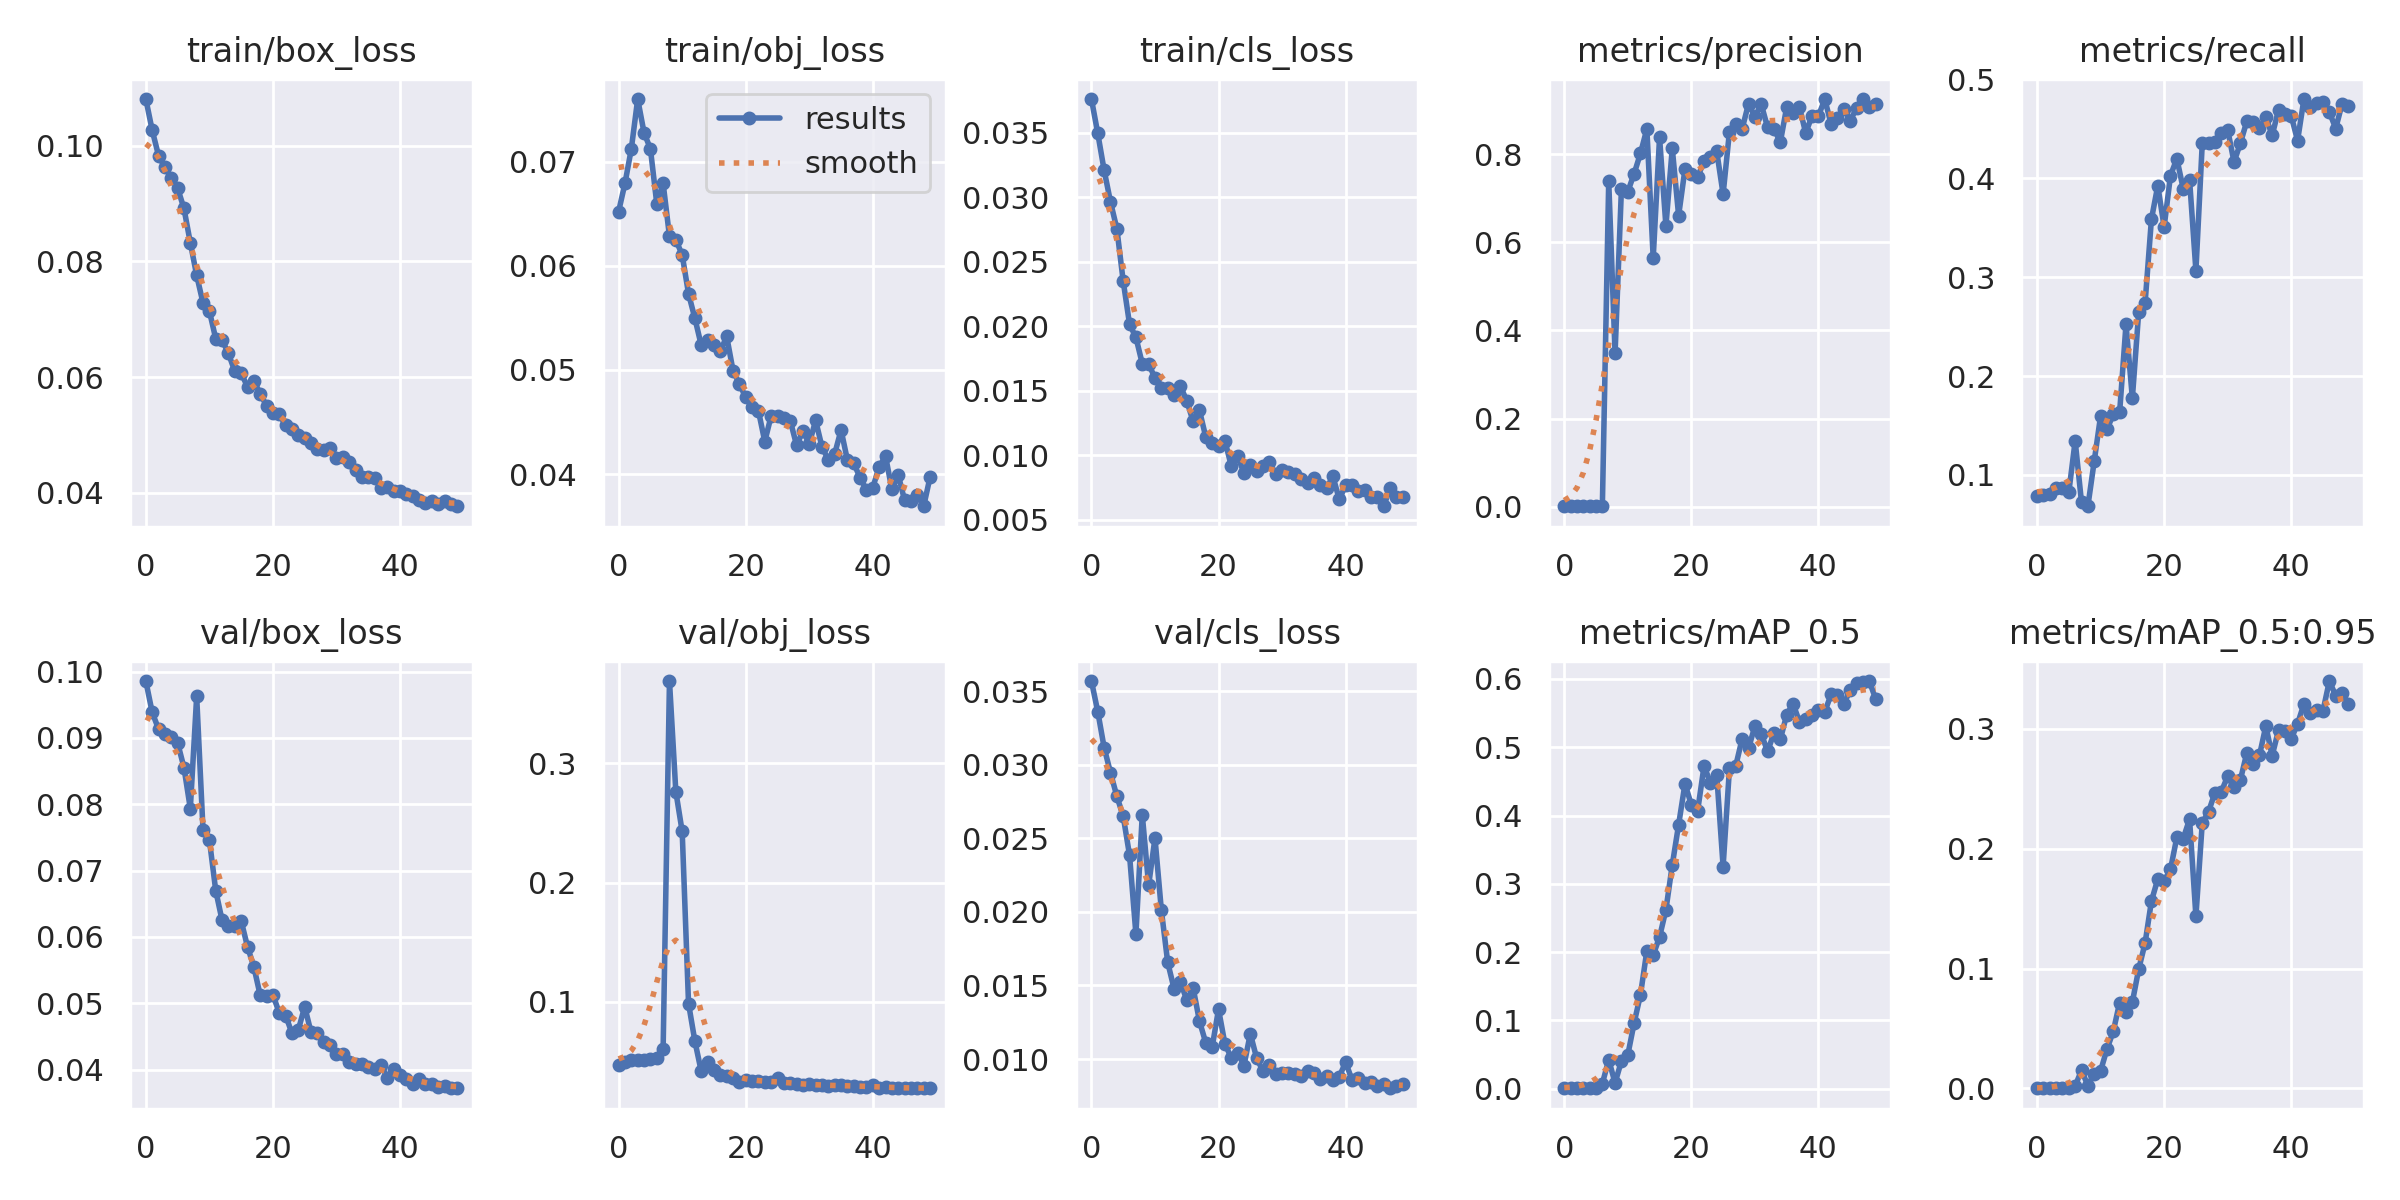

In [34]:
# 학습 결과 이미지 출력
# 학습 결과를 시각화합니다.
from IPython.display import Image as Display

current_directory = os.getcwd()
print("Current directory:", current_directory)  # 현재 작업 디렉토리를 출력합니다.
Display(filename='./Output/yolov5/runs/train/mask_detection_yolov5/results.png', width=1080)


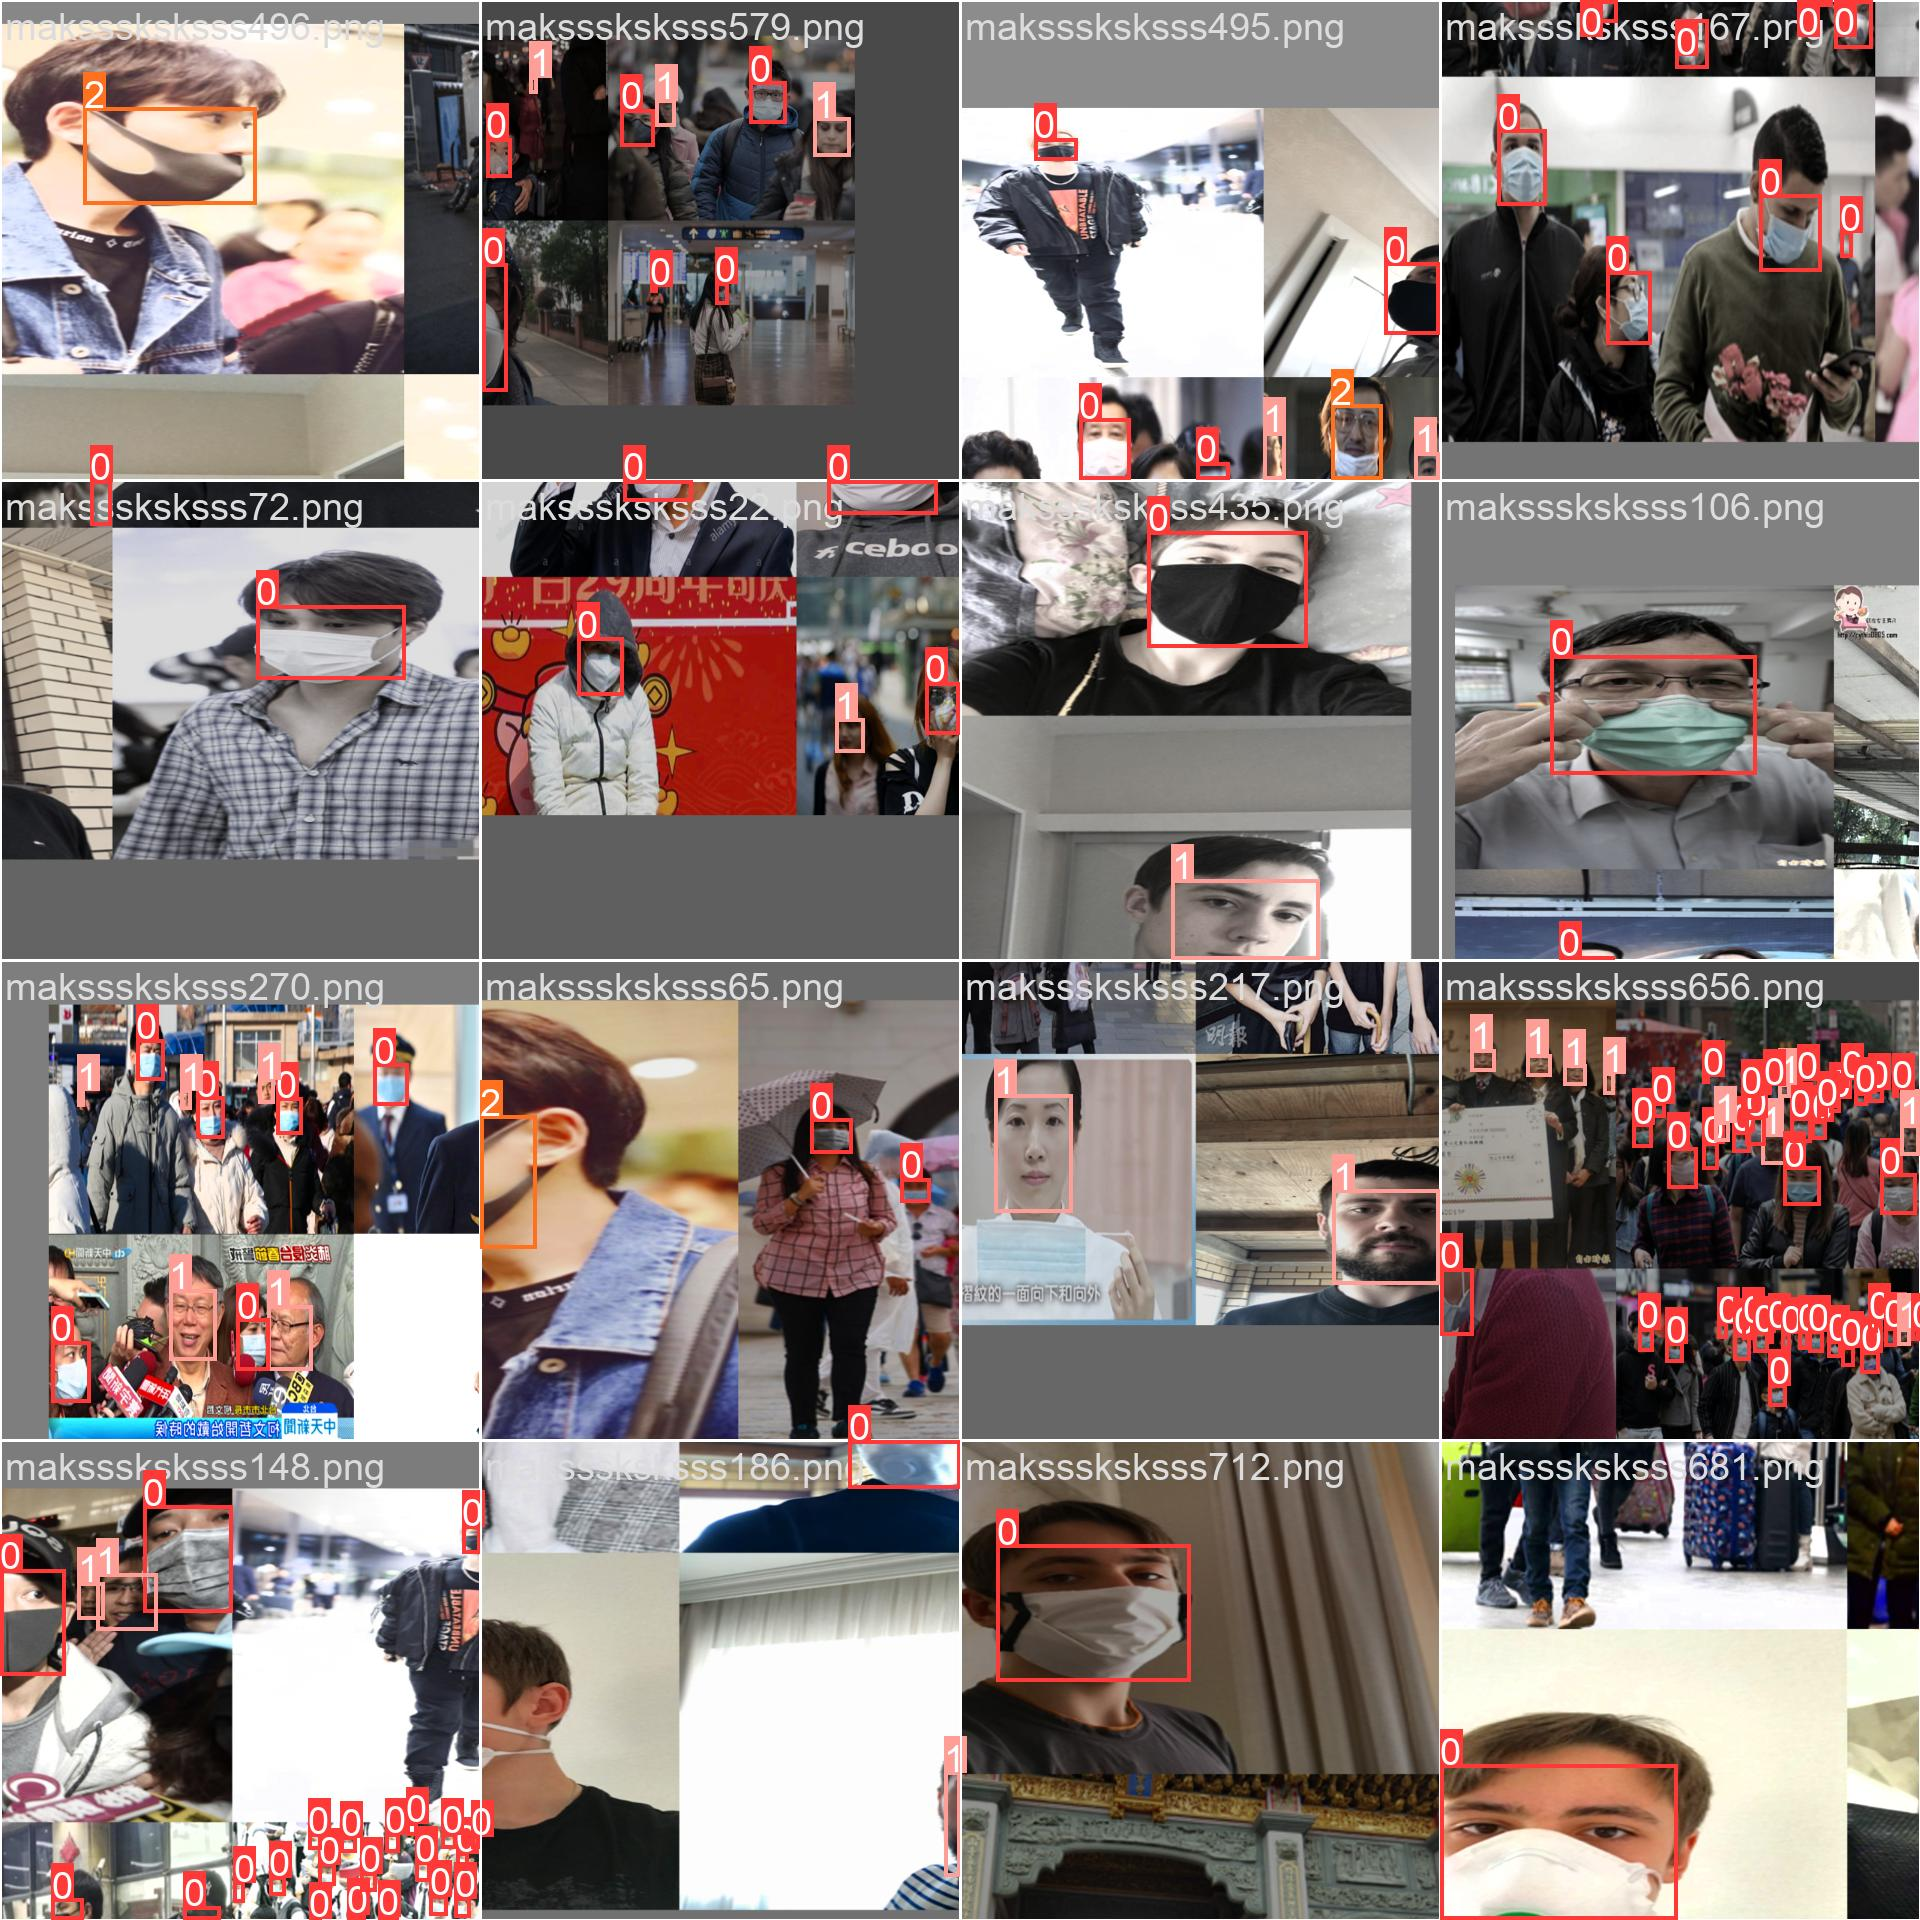

In [36]:
# 학습 배치 이미지 출력
# 학습 과정에서 생성된 배치 이미지를 출력합니다.
Display(filename='./Output/yolov5/runs/train/mask_detection_yolov5/train_batch0.jpg', width=200)

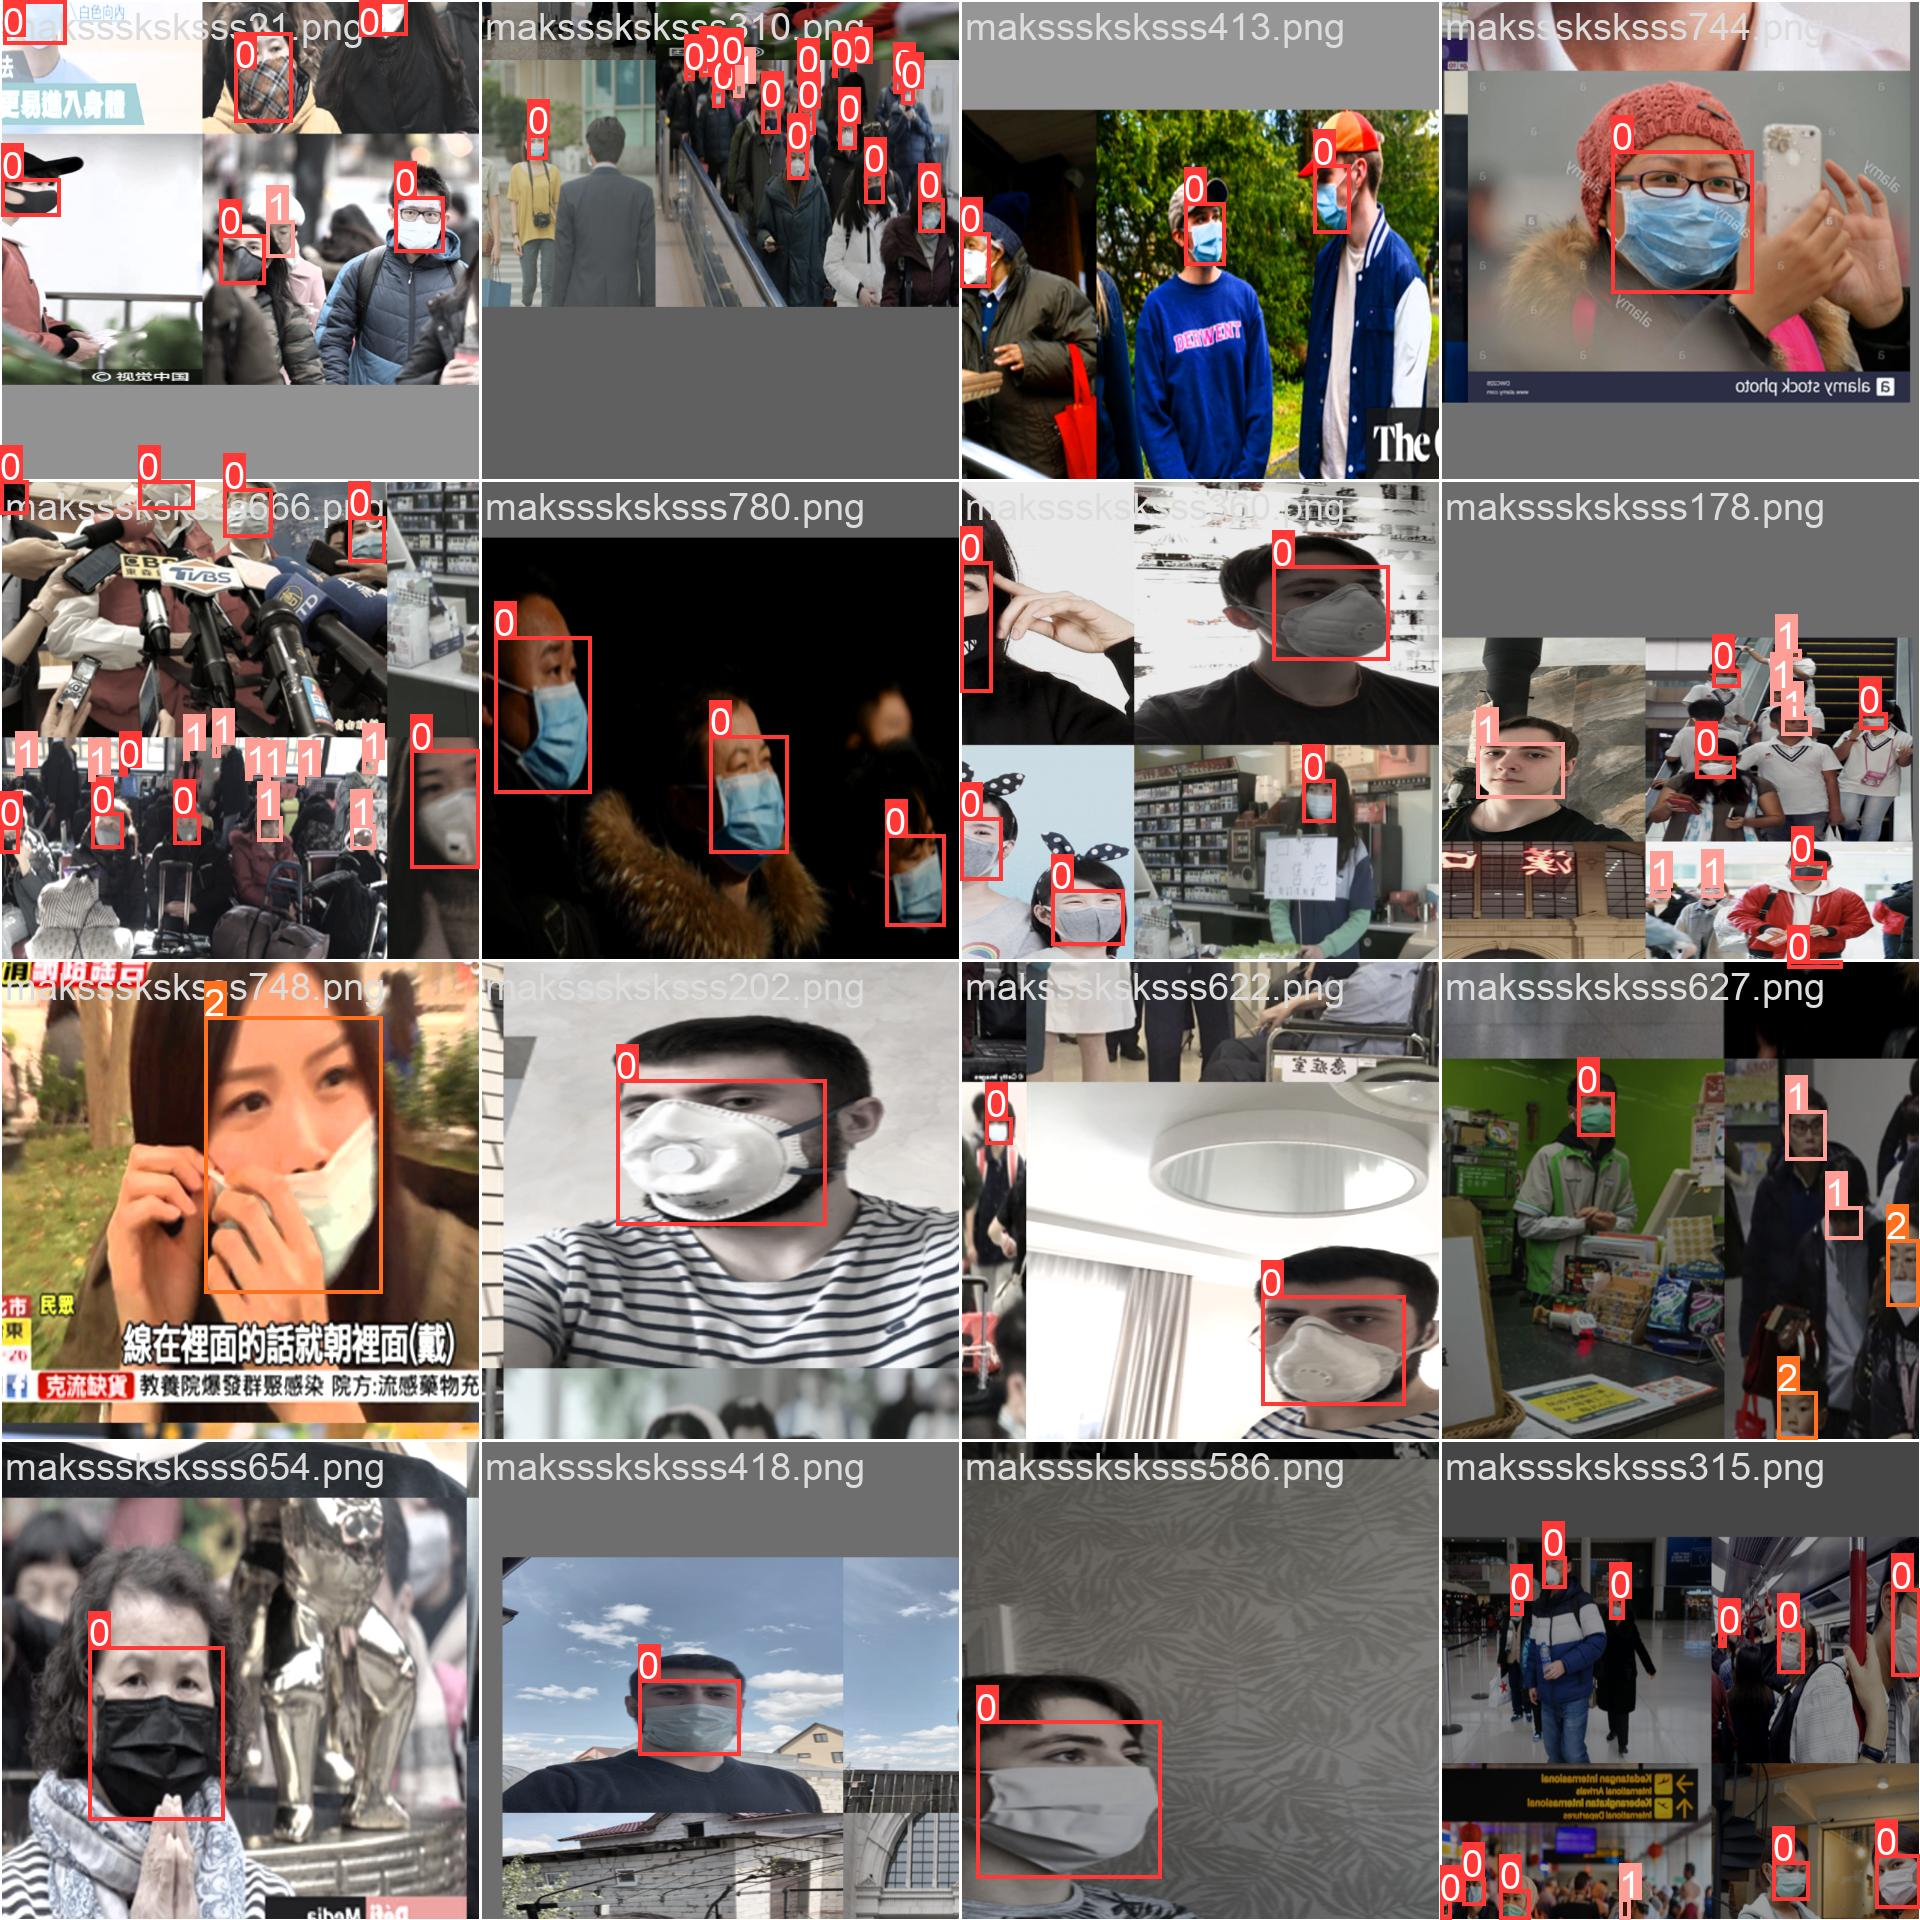

In [37]:
Display(filename='./Output/yolov5/runs/train/mask_detection_yolov5/train_batch1.jpg', width=600)

In [ ]:
 Display(filename='./Output/yolov5/runs/train/mask_detection_yolov5/train_batch2.jpg', width=200)

In [ ]:
import cv2
from yolov5 import YOLOv5

model = YOLOv5("runs/train/mask_detection_yolov5/weights/best.pt")

# 테스트 이미지에 대한 객체 인식 결과 시각화
test_image_path = 'path_to_test_image.jpg'
img = cv2.imread(test_image_path)
results = model.predict(img)

for *box, conf, cls in results.xyxy[0]:
    label = model.names[int(cls)]
    color = (0, 255, 0) if label == "with_mask" else (0, 0, 255) if label == "without_mask" else (255, 0, 0)
    cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, 2)
    cv2.putText(img, label, (int(box[0]), int(box[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
